<a href="https://colab.research.google.com/github/seojeongyun/naver_movie_review_sentiment_analysis/blob/main/naver_movie_review_sentimentation_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
cd "/content/drive/My Drive/ratings_train.txt"

[Errno 20] Not a directory: '/content/drive/My Drive/ratings_train.txt'
/content


In [173]:
!git clone https://github.com/seojeongyun/naver_movie_review_sentiment_analysis

fatal: destination path 'naver_movie_review_sentiment_analysis' already exists and is not an empty directory.


In [174]:
import urllib

if __name__ == '__main__':
    # Data download from url
    urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt",
                               filename="/content/drive/My Drive/ratings_train.txt")
    urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt",
                               filename="/content/drive/My Drive/ratings_test.txt")

In [175]:
pip install konlpy

In [176]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import re
import numpy as np
from tqdm import tqdm
import urllib
from sklearn.model_selection import train_test_split
from konlpy.tag import Mecab
from konlpy.tag import Okt

class preprocess:
    def __init__(self):
        # By using pandas, data save
        self.train_data = pd.read_table('/content/drive/My Drive/ratings_train.txt')
        self.test_data = pd.read_table('/content/drive/My Drive/ratings_test.txt')
        self.stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
        self.Okt = Okt()

    def dataset_len(self, type: str):  # Check the number of datasets
        if type == 'train':
            print('The number of train reviews : ', len(self.train_data))
        else:
            print('The number of test reviews : ', len(self.test_data))

    def process(self, type: str):
        if type == 'train':
            # Remove duplications column of document
            self.train_data.drop_duplicates(subset=['document'], inplace=True)

            # Remove the samples with null value
            train_data = self.train_data.dropna(how='any')

            # Remove special characters with regular expression
            train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
            train_data[:5]

            # Change the white space value to Null value and then remove
            train_data['document'] = train_data['document'].str.replace('^ +', "")  # change the white space to empty value
            train_data['document'].replace('', np.nan, inplace=True)
            print(train_data.isnull().sum())
            train_data = train_data.dropna(how='any')

            y_train = np.array(train_data['label']) # get labels
            return train_data, y_train

        else:
            # Apply same preprocess to test dataset
            self.test_data.drop_duplicates(subset=['document'], inplace=True)

            # Remove the samples with null value
            test_data = self.train_data.dropna(how='any')

            # remove duplicate value for column of ducument
            test_data['document'] = self.test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")  # Apply regular expression
            test_data[:5]

            test_data['document'] = self.test_data['document'].str.replace('^ +', "")  # change the white space to empty value
            test_data['document'].replace('', np.nan, inplace=True)  # change epmty space to null value
            test_data = test_data.dropna(how='any')  # remove the null value
            y_test = np.array(test_data['label'])
            return test_data, y_test

    def check_duplication(self):  # Check duplications column of document and label
        self.train_data['document'].nunique(), self.train_data['label'].nunique()
        self.test_data['document'].nunique(), self.test_data['label'].nunique()

    def remove_stopword(self, type: str, data):
        if type == 'train':
            X_train = []
            for sentence in tqdm(data['document']):
                tokenized_sentence = (self.Okt.morphs(sentence, stem=True))  # 토큰화
                stopwords_removed_sentence = [word for word in tokenized_sentence if not word in self.stopwords]  # 불용어 제거
                X_train.append(stopwords_removed_sentence)
            return X_train

        else:
            X_test = []
            for sentence in tqdm(data['document']):
                tokenized_sentence = self.Okt.morphs(sentence, stem=True)  # 토큰화
                stopwords_removed_sentence = [word for word in tokenized_sentence if not word in self.stopwords]  # 불용어 제거
                X_test.append(stopwords_removed_sentence)
            return X_test

if __name__ == '__main__':
    data = preprocess()

    data.dataset_len('train')
    data.dataset_len('test')

    data.check_duplication()

    data.process('train')
    data.process('test')

    # Check the ratio of train and labels
    data.train_data['label'].value_counts()

    # Check the null value from train set
    print(data.train_data.isnull().values.any())
    print(data.train_data.isnull().sum())
    data.train_data.loc[data.train_data.document.isnull()]

    print('The number of test dataset after preprocess :',len(data.test_data))

The number of train reviews :  150000
The number of test reviews :  50000


<ipython-input-176-9d4d4d064f29>:36: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
<ipython-input-176-9d4d4d064f29>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
<ipython-input-176-9d4d4d064f29>:40: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "")  # change the white space to empty value
<ipython-input-176-9d4d4d064f29>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

id            0
document    789
label         0
dtype: int64
True
id          0
document    1
label       0
dtype: int64
The number of test dataset after preprocess : 49158


<ipython-input-176-9d4d4d064f29>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['document'] = self.test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")  # Apply regular expression
<ipython-input-176-9d4d4d064f29>:59: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = self.test_data['document'].str.replace('^ +', "")  # change the white space to empty value
<ipython-input-176-9d4d4d064f29>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [177]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import re
import numpy as np
import urllib
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from konlpy.tag import Mecab
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [178]:
# Tokenize
class Tokenize:
    def __init__(self):
        self.tokenizer = Tokenizer()
        self.stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
        self.threshold = 3
        self.rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
        self.total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
        self.rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합
        self.vocab_size = 0
    def Tokenizer(self, data):
        return self.tokenizer.fit_on_texts(data)


    def pairing(self, data):
        self.tokenizer.fit_on_texts(data)
        self.total_cnt = len(self.tokenizer.word_index) # 단어의 수
        # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
        for key, value in self.tokenizer.word_counts.items():
            self.total_freq = self.total_freq + value

            # 단어의 등장 빈도수가 threshold보다 작으면
            if(value < self.threshold):
                self.rare_cnt = self.rare_cnt + 1
                self.Tokenizerrare_freq = self.rare_freq + value

        print('단어 집합(vocabulary)의 크기 :',self.total_cnt)
        print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(self.threshold - 1, self.rare_cnt))
        print("단어 집합에서 희귀 단어의 비율:", (self.rare_cnt / self.total_cnt)*100)
        print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (self.rare_freq / self.total_freq)*100)

        ### 등장 빈도수 보다 작으면 제거
        self.vocab_size = self.total_cnt - self.rare_cnt + 1
        print('단어 집합의 크기 :',self.vocab_size)

        return self.vocab_size

        #
    def text2int(self, data, type):
        tokenizer = Tokenizer(self.vocab_size)
        print('vocabsize로 토크나이저설정')
        tokenizer.fit_on_texts(data)
        print('핏온텍스트')
        if type=='train':
            X_train = tokenizer.texts_to_sequences(data)
            print('트레인 : 텍스트 투 시퀀스')
            print(X_train)
            return X_train
        else:
            X_test = tokenizer.texts_to_sequences(data)
            return X_test

def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [179]:
if __name__ == '__main__':
    ### 클래스 선언
    token = Tokenize()
    data = preprocess()

In [180]:
if __name__ == '__main__':
    ### 데이터 전처리
    X_train, Y_train = data.process('train')
    X_test, Y_test = data.process('test')

    ### 불용어 제거
    # X_train_removed = data.remove_stopword('train', X_train)
    # X_test_removed = data.remove_stopword('test', X_test)

    X_train_removed = data.remove_stopword('train', X_train[:10])
    X_test_removed = data.remove_stopword('texe', X_test[:10])

<ipython-input-176-9d4d4d064f29>:36: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
<ipython-input-176-9d4d4d064f29>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
<ipython-input-176-9d4d4d064f29>:40: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "")  # change the white space to empty value
<ipython-input-176-9d4d4d064f29>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

id            0
document    789
label         0
dtype: int64


<ipython-input-176-9d4d4d064f29>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['document'] = self.test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")  # Apply regular expression
<ipython-input-176-9d4d4d064f29>:59: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = self.test_data['document'].str.replace('^ +', "")  # change the white space to empty value
<ipython-input-176-9d4d4d064f29>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [181]:
y_train_ = Y_train[:10]
y_test_ = Y_test[:10]

In [182]:
if __name__ == '__main__':
# ### 토큰화 및 정수 인코딩
    # train_token = token.Tokenizer(X_train)
    # test_token = token.Tokenizer(X_test)

    ### 등장 빈도 수 낮은 단어 제외
    vocab_size = token.pairing(X_train_removed)
    print(len(X_train_removed))
    print('###############################')

    ### text2sequence
    train_token = token.text2int(data=X_train_removed, type='train')
    test_token = token.text2int(data=X_test_removed, type='test')
    print(train_token)
    print('###############################')

    ### remove empty sample
    drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
    x_train = np.delete(train_token, drop_train, axis=0)
    y_train = np.delete(Y_train, drop_train, axis=0)

    ### padding
    max_len = 30
    below_threshold_len(max_len, x_train)
    X_train = pad_sequences(x_train, maxlen=max_len)
    X_test = pad_sequences(test_token, maxlen=max_len)

단어 집합(vocabulary)의 크기 : 106
등장 빈도가 2번 이하인 희귀 단어의 수: 102
단어 집합에서 희귀 단어의 비율: 96.22641509433963
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0
단어 집합의 크기 : 5
10
###############################
vocabsize로 토크나이저설정
핏온텍스트
트레인 : 텍스트 투 시퀀스
[[], [1, 2], [], [3], [2, 1], [1], [], [4, 3, 2, 4], [3, 1], [4]]
vocabsize로 토크나이저설정
핏온텍스트
[[], [1, 2], [], [3], [2, 1], [1], [], [4, 3, 2, 4], [3, 1], [4]]
###############################
전체 샘플 중 길이가 30 이하인 샘플의 비율: 100.0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [183]:
import torch.nn as nn
import torch.optim as optim
import torch

In [226]:
class LSTM(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, embedding_dim, dropout):
    super().__init__()
    self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx=0)
    self.rnn = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, dropout=dropout)
    self.linear = nn.Linear(hidden_dim, output_dim)
    self.dropout = nn.Dropout(dropout)
    self.sigmoid = torch.sigmoid

  def forward(self, x):
    embed = self.dropout(self.embedding(x))
    output, _ = self.rnn(embed)
    output = self.linear(output[:, -1, :])
    return output

  def predict(self, output):
    prob = self.sigmoid(output)
    prob[prob > 0.5] = 1
    prob[prob <= 0.5] = 0
    return prob

  def _init_state(self, batch_size=1):
    weight = next(self.parameters()).data
    return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [227]:
embedding_dim = 100
hidden_dim = 128
dropout = 0.3
batch_size = 5

model = LSTM(input_dim=vocab_size, embedding_dim=embedding_dim, hidden_dim=hidden_dim, output_dim=1, dropout=dropout)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()


In [228]:
from torch.utils.data import Dataset

class ko_vector(Dataset):
    def __init__(self, x_train, y_train):
        self.x = x_train
        self.y = y_train.astype(np.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [229]:
from torch.utils.data.dataloader import DataLoader

ko_object = ko_vector(X_train, y_train_)
train_loader = DataLoader(ko_object,
                          batch_size=5,
                          shuffle=True)


In [244]:
def accuracy(pred, target):
    return torch.sum(pred == target).item()


def train(model, train_loader):
  model.train()

  epoch_loss, epoch_acc = 0, 0
  for i, batch_data in enumerate(train_loader):
    optimizer.zero_grad()
    x, y = batch_data[0], batch_data[1]
    y_hat = model(x).squeeze(1)

    loss = criterion(y_hat, y)
    loss.backward()
    optimizer.step()

    pred = model.predict(y_hat)
    epoch_acc += accuracy(pred, y)
    epoch_loss += loss.item()

  return epoch_loss / (len(train_loader)*5), epoch_acc / (len(train_loader)*5)

In [246]:
train_loss = []
train_acc = []

for _epoch in range(5): # 5 epoch
  loss, acc = train(model, train_loader)
  train_loss.append(loss)
  train_acc.append(acc)

In [247]:
import matplotlib.pyplot as plt

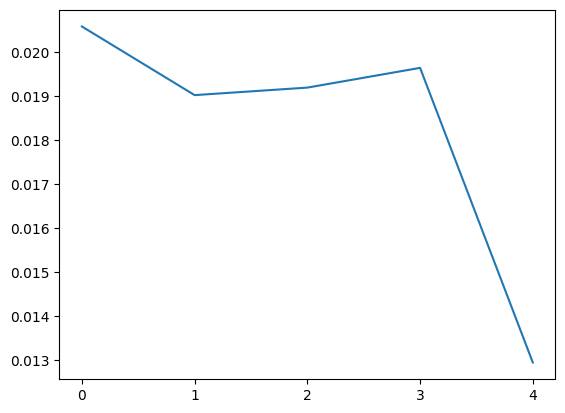

In [251]:
fig = plt.figure()
plt.plot(list(range(5)), train_loss)
plt.xticks(list(range(5)), list(range(5)))
plt.show()

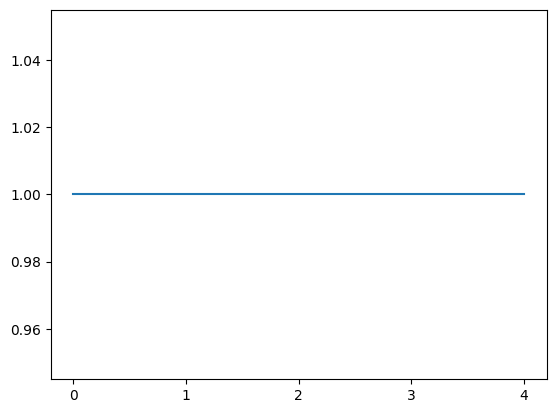

In [252]:
fig = plt.figure()
plt.plot(list(range(5)), train_acc)
plt.xticks(list(range(5)), list(range(5)))
plt.show()